<a href="https://colab.research.google.com/github/ravi-prakash1907/Machine-Learning-for-Cyber-Security/blob/main/frombeg/smsClassifactio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prepare the dataset

#### Tokanize and all


In [1]:
## libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import requests
import re

In [2]:
## location to store the dataset
try:
  os.mkdir('Datasets')
  dataFile = 'Datasets/SMSSpamCollection.txt'
except:
  dataFile = 'Datasets/SMSSpamCollection.txt'

In [3]:
## fun. to download the data from any url
def downloadData(fileURL, saveAs='downloaded'):
  req = requests.get(fileURL)
  fileURLContent = req.content
  data = open(saveAs, 'wb')
  
  data.write(fileURLContent)
  data.close()

In [4]:
## location of the file
fileURL = 'https://raw.githubusercontent.com/ravi-prakash1907/Machine-Learning-for-Cyber-Security/main/Datasets/smsspamcollection/SMSSpamCollection.txt?token=AJGAAOEA7CT74BXXDKGZZ6DAVCZO2'

## downloading the from url
downloadData(fileURL,dataFile)

In [5]:
## importing data
sms_spam = pd.read_csv(dataFile, sep='\t', header=None, names=['Label', 'SMS'])

print("Shape",sms_spam.shape)
sms_spam.head()

Shape (5572, 2)


,Label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
## checking for ham/spam SMS ratio from the whole bulk
sms_spam['Label'].value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: Label, dtype: float64

## Data Cleaning

In [7]:
def cleanDF(df):
  ### cleaning
  df['SMS'] = df['SMS'].str.lower()
  #df.head(3)

  ## removing the blank spaces
  df['SMS'] = df['SMS'].str.strip()
  #df.head(3)

  ## removing punctuations
  def removePunctuations(gotStr):
    cleanedStr = re.sub(r'[^\w\s]', '', gotStr)
    return cleanedStr
  
  df['SMS'] = df['SMS'].apply(removePunctuations)
  #df.head()

  return df

In [8]:
## cleaning using function call
sms_spam = cleanDF(sms_spam)
sms_spam.head()

,Label,SMS
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...


### Data Preparation

In [9]:
## introducing dummy variable
numLab = [int(s == 'spam') for s in sms_spam['Label']]
sms_spam['label_num'] = numLab
sms_spam.head()

,Label,SMS,label_num
0,ham,go until jurong point crazy available only in ...,0
1,ham,ok lar joking wif u oni,0
2,spam,free entry in 2 a wkly comp to win fa cup fina...,1
3,ham,u dun say so early hor u c already then say,0
4,ham,nah i dont think he goes to usf he lives aroun...,0


In [10]:
## changing to lower case
sms_spam['SMS'] = sms_spam['SMS'].str.split()

vocabulary = []
for sms in sms_spam['SMS']:
   for word in sms:
      vocabulary.append(word)

vocabulary = list(set(vocabulary))

In [11]:
word_counts_per_sms = {unique_word: [0] * len(sms_spam['SMS']) for unique_word in vocabulary}

for index, sms in enumerate(sms_spam['SMS']):
  for word in sms:
    word_counts_per_sms[word][index] += 1

In [12]:
word_counts = pd.DataFrame(word_counts_per_sms)
for col in word_counts.columns[:-1]:
  word_counts[col] %= 2

word_counts.head()

,voila,tons,chess,for38,payee,wales,nursery,definitly,08718720201,icicibankcom,guilty,distance,darlin,whens,amrca,dodda,alternativehope,oru,cr,complaining,cooped,wesley,skirt,sec,everyday,tensed,base,w1t1jy,morn,especially,261004,3wife,gbp450week,fgkslpo,3db,companies,plan,willpower,r836,drunken,...,8lb,diwali,stress,3lions,discussed,planned,oops,senrddnot,gyno,3miles,wwwasjesuscom,armenia,cantdo,ali,macha,09066362206,console,press,shoulders,differbe,shall,works,castor,systems,continued,twelve,lasagna,milk,dirty,gals,dabooks,sprwm,double,uncountable,click,ctagg,150pday,bcz,09050000928,mentionedtomorrow
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
word_counts['label'] = sms_spam['label_num']
word_counts.head()

,voila,tons,chess,for38,payee,wales,nursery,definitly,08718720201,icicibankcom,guilty,distance,darlin,whens,amrca,dodda,alternativehope,oru,cr,complaining,cooped,wesley,skirt,sec,everyday,tensed,base,w1t1jy,morn,especially,261004,3wife,gbp450week,fgkslpo,3db,companies,plan,willpower,r836,drunken,...,diwali,stress,3lions,discussed,planned,oops,senrddnot,gyno,3miles,wwwasjesuscom,armenia,cantdo,ali,macha,09066362206,console,press,shoulders,differbe,shall,works,castor,systems,continued,twelve,lasagna,milk,dirty,gals,dabooks,sprwm,double,uncountable,click,ctagg,150pday,bcz,09050000928,mentionedtomorrow,label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
word_counts.shape

(5572, 9586)

In [15]:
word_counts.drop_duplicates(inplace=True)
word_counts.head()

,voila,tons,chess,for38,payee,wales,nursery,definitly,08718720201,icicibankcom,guilty,distance,darlin,whens,amrca,dodda,alternativehope,oru,cr,complaining,cooped,wesley,skirt,sec,everyday,tensed,base,w1t1jy,morn,especially,261004,3wife,gbp450week,fgkslpo,3db,companies,plan,willpower,r836,drunken,...,diwali,stress,3lions,discussed,planned,oops,senrddnot,gyno,3miles,wwwasjesuscom,armenia,cantdo,ali,macha,09066362206,console,press,shoulders,differbe,shall,works,castor,systems,continued,twelve,lasagna,milk,dirty,gals,dabooks,sprwm,double,uncountable,click,ctagg,150pday,bcz,09050000928,mentionedtomorrow,label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
# are duplicates.
def getDuplicateColumns(df):
  
    # Create an empty set
    duplicateColumnNames = set()
      
    # Iterate through all the columns 
    # of dataframe
    for x in range(df.shape[1]):
          
        # Take column at xth index.
        col = df.iloc[:, x]
          
        # Iterate through all the columns in
        # DataFrame from (x + 1)th index to
        # last index
        for y in range(x + 1, df.shape[1]):
              
            # Take column at yth index.
            otherCol = df.iloc[:, y]
              
            # Check if two columns at x & y
            # index are equal or not,
            # if equal then adding 
            # to the set
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
                  
    # Return list of unique column names 
    # whose contents are duplicates.
    return list(duplicateColumnNames)

In [17]:
# dupCols = getDuplicateColumns(word_counts)

In [18]:
#word_counts = word_counts.drop_duplicates(columns=dupCols)

In [19]:
word_counts.shape

(5129, 9586)

---  
---

## Naive Bayes

In [20]:
df = word_counts.copy()
df.head()

,voila,tons,chess,for38,payee,wales,nursery,definitly,08718720201,icicibankcom,guilty,distance,darlin,whens,amrca,dodda,alternativehope,oru,cr,complaining,cooped,wesley,skirt,sec,everyday,tensed,base,w1t1jy,morn,especially,261004,3wife,gbp450week,fgkslpo,3db,companies,plan,willpower,r836,drunken,...,diwali,stress,3lions,discussed,planned,oops,senrddnot,gyno,3miles,wwwasjesuscom,armenia,cantdo,ali,macha,09066362206,console,press,shoulders,differbe,shall,works,castor,systems,continued,twelve,lasagna,milk,dirty,gals,dabooks,sprwm,double,uncountable,click,ctagg,150pday,bcz,09050000928,mentionedtomorrow,label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.describe()

,desert,info,contention,esaplanade,aa,syd,showroomscity,dinero,goigng,cable,place,08702840625,nightsexcellent,08715705022,peach,busy,worlds,gentleman,jenne,max6month,websitenow,lousy,m100,caps,mouth,young,sooooo,gbpsms,gaze,sundayish,stocked,gut,08712466669,fatty,monkeespeople,strong,relieved,x2,dasara,conserve,...,09701213186,aka,illspeak,reckon,prsn,ryan,call2optout674,titles,reaching,guessin,built,landing,shopthe,people,dontcha,watevr,bambling,curious,payed2day,plsi,tp,insha,09058097189,enough,sources,skins,sen,consent,09061209465,farm,txtno,ystrdayice,overtime,pleasure,internal,reltnship,arrange,opps,aig,label
count,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,...,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000
mean,0.000390,0.001755,0.000195,0.000195,0.000195,0.000195,0.000195,0.000195,0.000195,0.000195,0.009748,0.000195,0.000195,0.000585,0.000195,0.003509,0.000585,0.000390,0.000195,0.000195,0.000195,0.000585,0.000195,0.000195,0.000390,0.000195,0.000390,0.000195,0.000195,0.000195,0.000195,0.000195,0.000195,0.000195,0.000195,0.000975,0.000195,0.000195,0.000195,0.000195,...,0.000195,0.000390,0.000390,0.000390,0.000195,0.000195,0.000195,0.000390,0.001365,0.000195,0.000195,0.000195,0.000195,0.007604,0.000195,0.000195,0.000195,0.000390,0.000195,0.000195,0.000195,0.000195,0.000195,0.005264,0.000195,0.000195,0.000585,0.000195,0.000195,0.000390,0.000195,0.000195,0.000195,0.001170,0.000195,0.000195,0.001170,0.000195,0.000195,0.123026
std,0.019745,0.041857,0.013963,0.013963,0.013963,0.013963,0.013963,0.013963,0.013963,0.013963,0.098262,0.013963,0.013963,0.024180,0.013963,0.059142,0.024180,0.019745,0.013963,0.013963,0.013963,0.024180,0.013963,0.013963,0.019745,0.013963,0.019745,0.013963,0.013963,0.013963,0.013963,0.013963,0.013963,0.013963,0.013963,0.031210,0.013963,0.013963,0.013963,0.013963,...,0.013963,0.019745,0.019745,0.019745,0.013963,0.013963,0.013963,0.019745,0.036921,0.013963,0.013963,0.013963,0.013963,0.086876,0.013963,0.013963,0.013963,0.019745,0.013963,0.013963,0.013963,0.013963,0.013963,0.072371,0.013963,0.013963,0.024180,0.013963,0.013963,0.019745,0.013963,0.013963,0.013963,0.034186,0.013963,0.013963,0.034186,0.013963,0.013963,0.328499
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

### Data Praparation - 2

In [21]:
def groupCol(dataCol):
  dataCol = pd.Series(dataCol)
  return [str(val) for val in dataCol//10]

In [22]:
def prepare(df):
  ## grouping all cols
  for col in tuple(df.columns[:-1]):
    df[col] = groupCol(dataCol = df[col])

### Naive Bayes' Classifier
_It takes the tuples for set of the:_  
1. Dependent variables  
2. Values of any datapoint
3. Name of cloumn i.e. to be predicted

In [23]:
## gives rows with given set of cols
def getOneLabel(df,label,predLabel):
  tempDf = df.copy()
  x = [df.loc[i][label] in predLabel for i in df.index]
  count = 0
  ind = []
  for val in x:
    if not val:
      ind.append(count)
    count += 1
  
  #print(ind)
  tempDf.drop(ind, inplace=True)
  prepare(tempDf)
  return tempDf

In [24]:
## classifier
def naiveBayesianPredictor(df, labels, given, predCol):
  possibleCases = list(df[predCol].unique())
  finalPredDescription = {}
  
  for possibleCase in possibleCases:
    tempDF = getOneLabel(df, predCol, [possibleCase])
    preds = len(tempDF) / len(df)


    for index in range(len(given)):
      partialProb = tempDF[labels[index]].value_counts() / len(tempDF)

      if given[index] not in np.array(partialProb.index, dtype='uint64'):    
        tempList = list(np.array(partialProb.index, dtype='uint64'))
        largers = [val for val in tempList if val>int(given[index])]
        if largers and int(given[index])/largers[0] >= 0.5:
          preds *= partialProb[str(largers[0])]
        else:
          continue
      else:
        preds *= partialProb[given[index]]  #Naive bayesian classifier
    
    finalPredDescription[possibleCase] = preds
  
  ## converting predictions to pandas Series
  finalPredDescription = pd.Series(finalPredDescription)
  ## choosing MAP (Maximum A Posteriori)
  if finalPredDescription[0] == finalPredDescription[1]:
    finalPred = -1
  else:
    finalPred = str(finalPredDescription[finalPredDescription == max(finalPredDescription)].index[0])

  return finalPred,finalPredDescription

In [25]:
def predict(df,labels, given, predCol, describe = False):
  given = groupCol(dataCol=given)
  
  finalPrediction = naiveBayesianPredictor(df, labels, given, predVar)
  
  if finalPrediction == -1:
    print("Tie for the given e-mail!! Get a human to check for spam!")
  else:
    res = ' ' if bool(int(finalPrediction[0])) else ' NOT '
    print("\nGiven e-mail is{}Spam! \nLabel Value: {}".format(res,finalPrediction[0]))
  if describe:
    print("\nHere 1 indicates the probability of being a Spam E-Mail!")
    print("Probability Table:")
    return pd.DataFrame([finalPrediction[1]])


### Train-Test Split

In [26]:
# Randomize the dataset
data_randomized = df.sample(frac=1, random_state=1)

# Calculate index for split
training_test_index = round(len(data_randomized) * 0.8)

# Split into training and test sets
training_set = data_randomized[:training_test_index].reset_index(drop=True)
test_set = data_randomized[training_test_index:].reset_index(drop=True)

print(training_set.shape)
print(test_set.shape)

(4103, 9586)
(1026, 9586)


In [27]:
training_set['label'].value_counts(normalize=True)

0    0.876919
1    0.123081
Name: label, dtype: float64

In [28]:
test_set['label'].value_counts(normalize=True)

0    0.877193
1    0.122807
Name: label, dtype: float64

In [29]:
# After splitting
display(training_set.head(3))
display(test_set.head(3))

,voila,tons,chess,for38,payee,wales,nursery,definitly,08718720201,icicibankcom,guilty,distance,darlin,whens,amrca,dodda,alternativehope,oru,cr,complaining,cooped,wesley,skirt,sec,everyday,tensed,base,w1t1jy,morn,especially,261004,3wife,gbp450week,fgkslpo,3db,companies,plan,willpower,r836,drunken,...,diwali,stress,3lions,discussed,planned,oops,senrddnot,gyno,3miles,wwwasjesuscom,armenia,cantdo,ali,macha,09066362206,console,press,shoulders,differbe,shall,works,castor,systems,continued,twelve,lasagna,milk,dirty,gals,dabooks,sprwm,double,uncountable,click,ctagg,150pday,bcz,09050000928,mentionedtomorrow,label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,voila,tons,chess,for38,payee,wales,nursery,definitly,08718720201,icicibankcom,guilty,distance,darlin,whens,amrca,dodda,alternativehope,oru,cr,complaining,cooped,wesley,skirt,sec,everyday,tensed,base,w1t1jy,morn,especially,261004,3wife,gbp450week,fgkslpo,3db,companies,plan,willpower,r836,drunken,...,diwali,stress,3lions,discussed,planned,oops,senrddnot,gyno,3miles,wwwasjesuscom,armenia,cantdo,ali,macha,09066362206,console,press,shoulders,differbe,shall,works,castor,systems,continued,twelve,lasagna,milk,dirty,gals,dabooks,sprwm,double,uncountable,click,ctagg,150pday,bcz,09050000928,mentionedtomorrow,label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
## exporting test train data
training_set.to_csv("train.csv", index=False)
test_set.to_csv("test.csv", index=False)

In [30]:
temp = [x == 0 for x in test_set['label']]
temp[11:20]

[True, True, True, True, False, True, True, True, True]

---  
---

### Predictions

In [ ]:
def realVal(intVal):
  if intVal:
    print("Actually Spam!")
  else:
    print("Actually Ham!")

In [ ]:
labels = tuple(df.columns[:-1])
predVar = df.columns[-1]

#### Test case

In [ ]:
## case 1
given = list(test_set.iloc[0])
popped = given.pop()

realVal(popped)

Actually Ham!


In [ ]:
predict(training_set, labels, given, predVar, describe=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  



Given e-mail is NOT Spam! 
Label Value: 0

Here 1 indicates the probability of being a Spam E-Mail!
Probability Table:


,0,1
0,0.86541,0.13459


In [ ]:
## case 2
given = list(test_set.iloc[19])
popped = given.pop()

realVal(popped)

Actually Spam!


In [ ]:
predict(training_set, labels, given, predVar, describe=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  



Given e-mail is NOT Spam! 
Label Value: 0

Here 1 indicates the probability of being a Spam E-Mail!
Probability Table:


,0,1
0,0.86541,0.13459


---  
---

## Using `sklearn`

In [31]:
#Import Gaussian Naive Bayes model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [32]:
df = pd.read_csv(dataFile, sep='\t', header=None, names=['Label', 'SMS'])

df = cleanDF(df)
numLab = [int(s == 'spam') for s in df['Label']]
df['label_num'] = numLab
df.head()

,Label,SMS,label_num
0,ham,go until jurong point crazy available only in ...,0
1,ham,ok lar joking wif u oni,0
2,spam,free entry in 2 a wkly comp to win fa cup fina...,1
3,ham,u dun say so early hor u c already then say,0
4,ham,nah i dont think he goes to usf he lives aroun...,0


In [33]:
X,y = df.SMS,df.label_num
X_train,X_test,y_train,y_test = model_selection.train_test_split(X, y, test_size=0.30)

In [34]:
vectorizer = CountVectorizer()
counts = vectorizer.fit_transform(X_train.values)

In [35]:
classifier = MultinomialNB()
targets = y_train.values
classifier.fit(counts, targets)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [36]:
examples = df['SMS'][0:10]

example_count = vectorizer.transform(examples)
predictions = classifier.predict(example_count)

In [37]:
print("Predicted: {} \nActual:    {}".format(list(predictions),list(df['label_num'][0:10])))

Predicted: [0, 0, 1, 0, 0, 0, 0, 0, 1, 1] 
Actual:    [0, 0, 1, 0, 0, 1, 0, 0, 1, 1]


### Performance Measures

In [44]:
total_count = vectorizer.transform(X_test)
predictions = classifier.predict(total_count)

In [45]:
f1Score=f1_score(y_test,predictions)

accuracy=accuracy_score(y_test,predictions)
precision=precision_score(y_test,predictions)
recall=recall_score(y_test,predictions)

In [46]:
print("Model's Performance Measures:\n")
print("F1-Score: {} \nAccuracy: {} \nPrecision: {} \nRecall: {}".format(f1Score,accuracy,precision,recall))

Model's Performance Measures:

F1-Score: 0.9180327868852459 
Accuracy: 0.979066985645933 
Precision: 0.9607843137254902 
Recall: 0.8789237668161435


Confusion matrix: 
 [[1441    8]
 [  27  196]] 



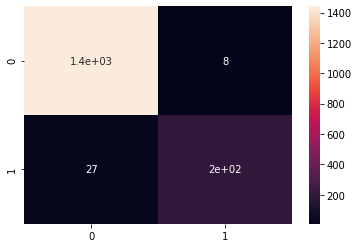

In [48]:
cf_matrix = confusion_matrix(y_test,predictions)
print("Confusion matrix: \n", cf_matrix, "\n")

sns.heatmap(cf_matrix, annot=True)